## Observations 
available:
| Dataset    | variables   | ESMValTool-find |
|:------------|:-------------|:--------------------|
|ERA-Interim | sst(tos, Omon)(ts, Amon), pr, taux(tauu) |OBS6, reanaly, tier3 |
|NOAA-CIRES-20CR-V2     |prw,  |OBS6, Tier2 |
|HadISST     |tos/ts,   |OBS, Tier2 |
|NOAA-ERSSTv5|tos      |OBS6, Tier2 |
|NCEP-NCAR-R1|ts, pr   |OBS6, Tier2 |
|NCEP        |pr     |OBS, Tier2 |
|GPCP-SG     |pr,    |OBS, Tier2 |

Need to get:
- TropFlux - sst, taux (https://incois.gov.in/tropflux/DataHome.jsp)
- CMAP - pr (https://psl.noaa.gov/data/gridded/data.cmap.html)

In [1]:
from esmvalcore.config import CFG
from esmvalcore.dataset import Dataset

CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

obs = Dataset(dataset= 'ERA-Interim', project= 'OBS6', 
              type= 'reanaly', version='1', 
              timerange='1979/2018', tier='3', 
              mip='Omon', short_name='ts')

print(len(obs.files))
list(obs.from_files())
# obs.find_files(), obs.files

0


[Dataset:
 {'dataset': 'ERA-Interim',
  'project': 'OBS6',
  'mip': 'Omon',
  'short_name': 'ts',
  'frequency': 'mon',
  'long_name': 'Surface Temperature',
  'modeling_realm': ['atmos'],
  'original_short_name': 'ts',
  'standard_name': 'surface_temperature',
  'tier': '3',
  'timerange': '1979/2018',
  'type': 'reanaly',
  'units': 'K',
  'version': '1'}
 session: 'session-ef9ba2fe-c08f-481a-a0ac-67187eddfb4a_20241001_043535']

In [4]:
from esmvalcore.config import CFG
CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')
from esmvalcore.dataset import Dataset
obs_sst = Dataset(dataset= 'NOAA-ERSSTv5', 
                 project= 'OBS6', 
                 type= '*', 
                 version='*' , 
                 timerange = '1970/2018', 
                 tier='*', 
                 mip='*', 
                 short_name='tos')

obs_sst.find_files()
obs_sst.files

# list(obs_sst.from_files())

[LocalFile('/g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier2/NOAA-ERSSTv5/OBS6_NOAA-ERSSTv5_reanaly_v5_Omon_tos_185401-200712.nc'),
 LocalFile('/g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier2/NOAA-ERSSTv5/OBS6_NOAA-ERSSTv5_reanaly_v5_Omon_tos_200801-202001.nc')]

In [1]:
from esmvalcore.config import CFG
from esmvalcore.dataset import Dataset

CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

In [2]:

CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241007_233937"]
CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241016_034743"]
CFG['rootpath']['OBS6']

['/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241016_034743']

In [3]:
# obs = Dataset(dataset= 'ensda-v351', project= 'CREATE-IP', 
#               type= 'reanalysis', version='*', 
#               timerange='*', institute='NOAA-ESRLandCIRES', 
#               mip='Amon', short_name='tas')

model = Dataset(
    short_name='tauv', project='CMIP6', institute='*',
    mip="Amon", exp="historical", ensemble="r1i1p1f1",
    timerange="19790101/20190101",
    dataset="*",  grid="gn"
)
print(len(model.files),len(list(model.from_files())))
obs = Dataset(dataset='*',project= 'OBS6', mip= 'Amon', tier='*', #'NOAA-CIRES-20CR-V2'
         type= 'reanaly', version= '*', start_year= '1910', end_year= '2012', short_name='tauv') #pr, tauu, tauv
print(len(obs.files))
list(obs.from_files())

# obs.find_files(), obs.files
# for obs_ds in list(obs.from_files()):
#     obs_ds['tier'] = obs_ds['tier'][-1]
    # print(obs_ds['tier'][-1],obs_ds.load())


2 2
1


[Dataset:
 {'dataset': 'NCEP-DOE-R2',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'tauv',
  'end_year': '2012',
  'frequency': 'mon',
  'long_name': 'Surface Downward Northward Wind Stress',
  'modeling_realm': ['atmos'],
  'original_short_name': 'tauv',
  'standard_name': 'surface_downward_northward_stress',
  'start_year': '1910',
  'tier': 'Tier2',
  'type': 'reanaly',
  'units': 'Pa',
  'version': '*'}
 session: 'session-f65fa29a-b108-4a3d-9f30-0c7ebcbc7109_20241016_035252']

In [10]:
%%time
import iris
import cartopy.crs as ccrs
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from esmvalcore.preprocessor import (
                regrid,
                extract_region, convert_units,
                climate_statistics, annual_statistics, area_statistics ) # month mean, standard deviation
iris.FUTURE.datum_support = True
def preproc_base(cube):
    # cube = convert_units(cube, units="mm/day")
    # cube = extract_region(cube, 150, 270, -25, 25)
    cube = area_statistics(cube, 'mean')
    cube = annual_statistics(cube, 'mean')
    # cube = cube.collapsed('month_number', iris.analysis.STD_DEV)

    cube.convert_units('1e-3 N/m2')
    return cube
    
# print(obs.files)
preproc_1 = {}
for obs_ds in list(obs.from_files()):
    obs_ds['tier'] = obs_ds['tier'][-1]
    obs_ds['timerange'] = '1910/2010'
    cube = preproc_base(obs_ds.load())
    iris.util.promote_aux_coord_to_dim_coord(cube, 'year')
    preproc_1[obs_ds['dataset']] = cube
    print(cube.shape)

for ds in list(model.from_files()):
    cube = preproc_base(ds.load())
    iris.util.promote_aux_coord_to_dim_coord(cube, 'year')
    preproc_1[ds['dataset']] = cube
    print('model',cube.shape)
    
# dataout = preproc_base(obs.load())
# dataout

 tauv: attribute positive not present
loaded from file /g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tauv/gn/v20191108/tauv_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
 tauv: attribute positive not present
loaded from file 


(32,)
model (36,)


 tauv: attribute positive not present
loaded from file /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Amon/tauv/gn/v20191115/tauv_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
 tauv: attribute positive not present
loaded from file 


model (36,)
CPU times: user 458 ms, sys: 29.5 ms, total: 488 ms
Wall time: 492 ms


CPU times: user 1.56 s, sys: 260 ms, total: 1.82 s
Wall time: 1.8 s


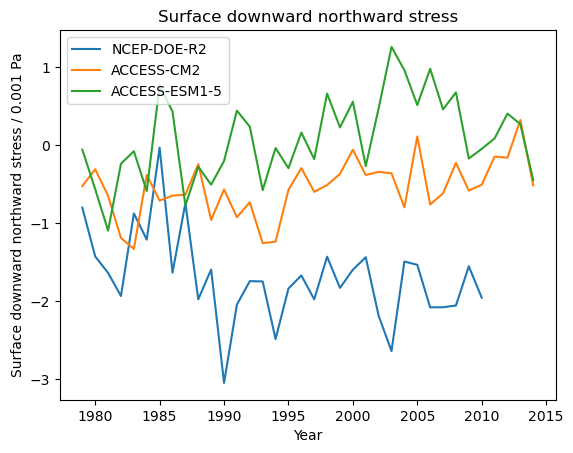

In [11]:
%%time
# qplt.contourf(preproc_1['CRU'])
for lb, cube in preproc_1.items():
    qplt.plot(cube, label=lb)

plt.legend()
# plt.coastlines()

CPU times: user 4.6 s, sys: 32.8 s, total: 37.4 s
Wall time: 39.6 s


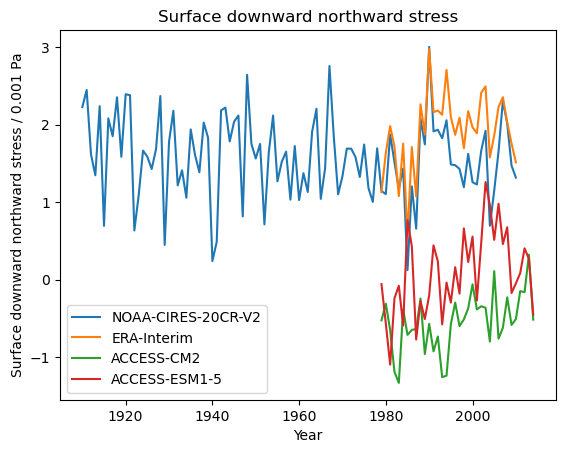

In [14]:
%%time
# qplt.contourf(preproc_1['CRU'])
for lb, cube in preproc_1.items():
    qplt.plot(cube, label=lb)

plt.legend()
# plt.coastlines()

CPU times: user 3.18 s, sys: 30 s, total: 33.1 s
Wall time: 32.2 s


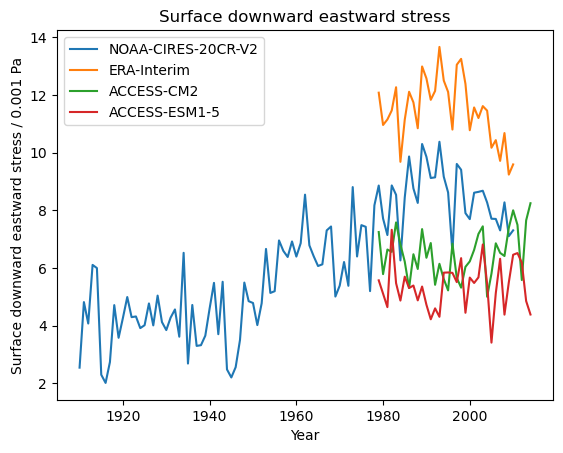

In [11]:
%%time
# qplt.contourf(preproc_1['CRU'])
for lb, cube in preproc_1.items():
    qplt.plot(cube, label=lb)

plt.legend()
# plt.coastlines()

In [32]:
import os
rawpath = '/scratch/iq82/fc6164/esmvaltool_output/climate_data/Tier2/NOAA-CIRES-20CR-V2/surface_gauss'
filels =[]
for filename in os.listdir(rawpath):
    filels.append(os.path.join(rawpath, filename))
cbls = iris.load(filels)
cbls

[<iris 'Cube' of Time Boundaries / (unknown) (time: 1704; -- : 2)>,
<iris 'Cube' of Time Boundaries / (unknown) (time: 1704; -- : 2)>,
<iris 'Cube' of Time Boundaries / (unknown) (time: 1704; -- : 2)>,
<iris 'Cube' of Time Boundaries / (unknown) (time: 1704; -- : 2)>,
<iris 'Cube' of Time Boundaries / (unknown) (time: 1704; -- : 2)>,
<iris 'Cube' of Time Boundaries / (unknown) (time: 1704; -- : 2)>,
<iris 'Cube' of Monthly Upward Longwave Radiation Flux at nominal top of atmosphere / (W/m^2) (time: 1704; latitude: 94; longitude: 192)>,
<iris 'Cube' of Monthly Upward Solar Radiation Flux at nominal top of atmosphere / (W/m^2) (time: 1704; latitude: 94; longitude: 192)>,
<iris 'Cube' of cloud_area_fraction / (%) (time: 1704; latitude: 94; longitude: 192)>,
<iris 'Cube' of downward_eastward_momentum_flux_in_air / (N/m^2) (time: 1704; latitude: 94; longitude: 192)>,
<iris 'Cube' of downward_northward_momentum_flux_in_air / (N/m^2) (time: 1704; latitude: 94; longitude: 192)>,
<iris 'Cube' of precipitation_flux / (kg/m^2/s) (time: 1704; latitude: 94; longitude: 192)>]

In [8]:
import iris
# CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241007_233937"]
CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_044626"]
# CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_223520"]
CFG['rootpath']['OBS6']

['/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_044626']

In [9]:
obs = Dataset(dataset='NOAA-CIRES-20CR-V2',project= 'OBS6', mip= 'Amon', tier='*', #''
         type= 'reanaly', version= '*', start_year= '1910', end_year= '2012', short_name='tauu')
print(obs.files)
cube = obs.load()
cube.attributes, cube.long_name
iris.load(obs.files[0])

(for file /scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_044626/Tier2/NOAA-CIRES-20CR-V2/OBS6_NOAA-CIRES-20CR-V2_reanaly_v2_Amon_tauu_187101-201212.nc)
(for file /scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_044626/Tier2/NOAA-CIRES-20CR-V2/OBS6_NOAA-CIRES-20CR-V2_reanaly_v2_Amon_tauu_187101-201212.nc)


[LocalFile('/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_044626/Tier2/NOAA-CIRES-20CR-V2/OBS6_NOAA-CIRES-20CR-V2_reanaly_v2_Amon_tauu_187101-201212.nc')]


[<iris 'Cube' of unknown / (Pa) (time: 1704; latitude: 94; longitude: 192)>]